In [40]:
import tensorflow as tf
import numpy as np
from IPython.display import YouTubeVideo
import pandas as pd
from matplotlib import pyplot as plt

In [134]:
frame_lvl_record = "train2896.tfrecord"

In [146]:
vid_ids = []
labels = []
for example in tf.python_io.tf_record_iterator(frame_lvl_record):
    tf_example = tf.train.Example.FromString(example)
    vid_ids.append(tf_example.features.feature['id']
                   .bytes_list.value[0].decode(encoding='UTF-8'))
    labels.append(tf_example.features.feature['labels'].int64_list.value)

In [176]:
len(vid_ids)

1019

In [175]:
vid = 5
print('The first video id:',vid_ids[vid])
print('Label of this video:',[label_mapping[x] for x in list(set(labels[vid]))])

The first video id: f0US
Label of this video: ['Art', 'Graffiti', 'Sketch (drawing)']


In [194]:
feat_audio[0]

[array([186.,  50., 101., 127., 128., 166.,  86.,  74., 205., 128., 190.,
        151.,  55., 159.,  54.,  94., 152., 130.,  74., 109., 126., 222.,
         98., 123., 107., 204., 155.,  81., 138., 122., 118.,  94., 103.,
        120., 115., 116., 128., 102., 113.,  46., 122., 225., 178., 171.,
        160., 137., 164., 121., 160., 156., 161., 154., 155., 117., 114.,
        100., 161., 189.,  91., 110., 143.,  87.,  72., 141.,  93., 192.,
        201., 102.,  67., 182.,  72., 163., 123., 162.,  92., 222., 146.,
        107.,  97., 166., 145., 130., 130., 228.,  71., 121., 167., 228.,
        121., 183., 111., 109.,  95.,  84., 144., 137., 118., 140., 110.,
        207.,  62., 116.,  89., 123.,  95.,  67., 100., 122., 167.,  97.,
         37., 179., 164., 137., 147., 160., 120.,  78.,  61., 218., 172.,
        201., 156.,  99.,  95., 133.,  42., 127.], dtype=float32),
 array([188.,  68.,  99., 119., 127., 193., 127., 101., 223., 157., 174.,
        161.,  65., 171.,  36., 126., 119., 1

In [193]:
feat_rgb[0]

[array([ 91.,  96.,  62., ...,  41., 183., 197.], dtype=float32),
 array([ 92.,  94.,  63., ...,  63., 183., 157.], dtype=float32),
 array([ 90.,  94.,  64., ...,  59., 173., 150.], dtype=float32),
 array([ 96.,  95.,  61., ...,  54., 174., 172.], dtype=float32),
 array([ 95.,  96.,  60., ...,  57., 184., 170.], dtype=float32),
 array([ 96.,  96.,  60., ...,  56., 185., 171.], dtype=float32),
 array([ 92.,  97.,  62., ...,  59., 188., 182.], dtype=float32),
 array([ 93.,  98.,  62., ...,  58., 188., 181.], dtype=float32),
 array([ 93.,  97.,  61., ...,  57., 179., 175.], dtype=float32),
 array([ 94.,  96.,  61., ...,  58., 180., 176.], dtype=float32),
 array([ 94.,  97.,  61., ...,  62., 181., 171.], dtype=float32),
 array([ 95.,  97.,  61., ...,  60., 181., 172.], dtype=float32),
 array([ 94.,  94.,  61., ...,  61., 175., 171.], dtype=float32),
 array([ 94.,  95.,  61., ...,  59., 174., 171.], dtype=float32),
 array([ 94.,  96.,  61., ...,  58., 181., 177.], dtype=float32),
 array([ 9

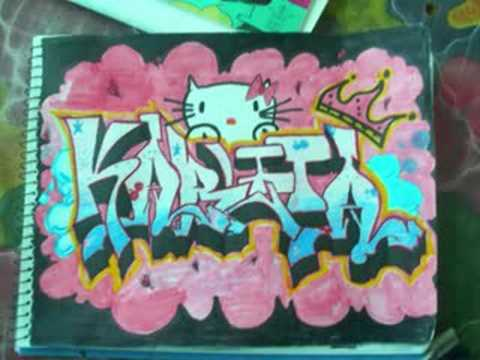

In [173]:
YouTubeVideo('9F6QdyGWLyY')

In [166]:
feat_rgb = []
feat_audio = []
n = 0
for example in tf.python_io.tf_record_iterator(frame_lvl_record):  
    tf_seq_example = tf.train.SequenceExample.FromString(example)
    n_frames = len(tf_seq_example.feature_lists.feature_list['audio'].feature)
    sess = tf.InteractiveSession()
    rgb_frame = []
    audio_frame = []
    # iterate through frames
    for i in range(n_frames):
        rgb_frame.append(tf.cast(tf.decode_raw(tf_seq_example
                                               .feature_lists
                                               .feature_list['rgb']
                                               .feature[i]
                                               .bytes_list
                                               .value[0],tf.uint8),
                                 tf.float32).eval())
        audio_frame.append(tf.cast(tf.decode_raw(tf_seq_example
                                                 .feature_lists
                                                 .feature_list['audio']
                                                 .feature[i]
                                                 .bytes_list
                                                 .value[0],tf.uint8),
                                   tf.float32).eval())
                
    sess.close()
    feat_audio.append(audio_frame)
    feat_rgb.append(rgb_frame)
    n += 1
    if n == 2:
        break

/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [192]:
len(feat_rgb[0][0])

1024

In [190]:
len(feat_rgb[0])

123

In [ ]:
len(feat_rgb[1])

In [170]:
len(feat_rgb[1])

300

# RNN vectors
* We want to subsample the rgb features
    * 10-20 frames
    * need to figure out which ones
    * first 10 and last 10
    * we'll end up with 20 x 1024

In [156]:
feat_rgb[0][0]

1024

In [184]:
len(feat_audio[0][0])

128

In [95]:
len(feat_rgb[0])

300

In [36]:
vocab = pd.read_csv('vocabulary.csv')
print("we have {} unique labels in the dataset".format(len(vocab['Index'].unique())))

we have 3862 unique labels in the dataset


In [52]:
n = 100 # although, we'll only show those that appear in the 1,000 for this competition
from collections import Counter

label_mapping =  vocab[['Index', 'Name']].set_index('Index', drop=True).to_dict()['Name']

top_n = Counter([item for sublist in labels for item in sublist]).most_common(n)
top_n_labels = [int(i[0]) for i in top_n]
top_n_label_names = [label_mapping[x] for x in top_n_labels if x in label_mapping] # filter out the labels that aren't in the 1,000 used for this competition
print(top_n_label_names)

['Game', 'Video game', 'Concert', 'Vehicle', 'Musician', 'Performance art', 'Cartoon', 'Food', 'Dance', 'Car', 'Music video', 'Guitar', 'Association football', 'String instrument', 'Musical ensemble', 'Animal', 'Recipe', 'Pet', 'Cooking', 'Motorsport', 'Cuisine', 'Dish (food)', 'Minecraft', 'Gadget', 'Animation', 'Mobile phone', 'Racing', 'Trailer (promotion)', 'Smartphone', 'Drum kit', 'Motorcycle', 'Fish', 'Airplane', 'Toy', 'Acoustic guitar', 'Electric guitar', 'Orchestra', 'Aircraft', 'American football', 'Fishing', 'Piano', 'Call of Duty', 'Drum', 'Radio-controlled model', 'Pianist', 'Sports game', 'Train', 'Keyboard instrument', 'Choir', 'Personal computer', 'Highlight film', 'House', 'Basketball', 'Tractor', 'Strategy video game', 'Festival', 'Cycling', 'Bicycle', 'Fighting game', 'Action-adventure game', 'Fashion', 'Cosmetics', 'Outdoor recreation', 'Skateboard', 'Hair', 'Rail transport', 'Drummer', 'Sports car', 'Basketball moves', 'Aquarium', 'Skateboarding', 'Bus', 'Transpor

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


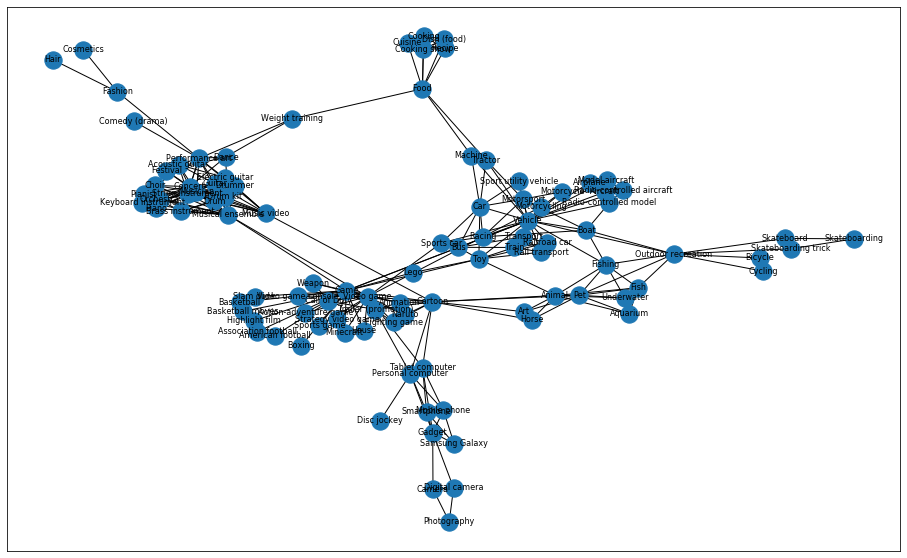

In [83]:
import networkx as nx
from itertools import combinations

G = nx.Graph()

G.clear()
for list_of_nodes in labels:
    filtered_nodes = set(list_of_nodes).intersection(set(top_n_labels) & 
                                                     set(vocab['Index'].unique()))  
    for node1,node2 in list(combinations(filtered_nodes,2)): 
        node1_name = label_mapping[node1]
        node2_name = label_mapping[node2]
        G.add_node(node1_name)
        G.add_node(node2_name)
        G.add_edge(node1_name, node2_name)

plt.figure(figsize=(16,10))
nx.draw_networkx(G, font_size="8")

https://blog.coast.ai/five-video-classification-methods-implemented-in-keras-and-tensorflow-99cad29cc0b5

Extracting features from each frame with a ConvNet and passing the sequence to a separate RNN

Transfer learning with CNN Inception

the Inception ConvNet to extract features followed by a single-layer LSTM RNN!

* First, we run every frame from every video through Inception, saving the output from the final pool layer of the network. So we effectively chop off the top classification part of the network so that we end up with a 2,048-d vector of features that we can pass to our RNN.


* Second, we convert those extracted features into sequences of extracted features. If you recall from our constraints, we want to turn each video into a 40-frame sequence. So we stitch the sampled 40 frames together, save that to disk, and now we’re ready to train different RNN models without needing to continuously pass our images through the CNN every time we read the same sample or train a new network architecture.


* For the RNN, we use a single, 4096-wide LSTM layer, followed by a 1024 Dense layer, with some dropout in between. This relatively shallow network outperformed all variants where I tried multiple stacked LSTMs. Let’s take a look at the results:

In [145]:
"""
A collection of models we'll use to attempt to classify videos.
"""
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

class ResearchModels():
    def __init__(self, nb_classes, model, seq_length,
                 saved_model=None, features_length=2048):
        """
        `model` = one of:
            lstm
            lrcn
            mlp
            conv_3d
            c3d
        `nb_classes` = the number of classes to predict
        `seq_length` = the length of our video sequences
        `saved_model` = the path to a saved Keras model to load
        """

        # Set defaults.
        self.seq_length = seq_length
        self.load_model = load_model
        self.saved_model = saved_model
        self.nb_classes = nb_classes
        self.feature_queue = deque()

        # Set the metrics. Only use top k if there's a need.
        metrics = ['accuracy']
        if self.nb_classes >= 10:
            metrics.append('top_k_categorical_accuracy')

        # Get the appropriate model.
        if self.saved_model is not None:
            print("Loading model %s" % self.saved_model)
            self.model = load_model(self.saved_model)
        elif model == 'lstm':
            print("Loading LSTM model.")
            self.input_shape = (seq_length, features_length)
            self.model = self.lstm()
        elif model == 'lrcn':
            print("Loading CNN-LSTM model.")
            self.input_shape = (seq_length, 80, 80, 3)
            self.model = self.lrcn()
        elif model == 'mlp':
            print("Loading simple MLP.")
            self.input_shape = (seq_length, features_length)
            self.model = self.mlp()
        elif model == 'conv_3d':
            print("Loading Conv3D")
            self.input_shape = (seq_length, 80, 80, 3)
            self.model = self.conv_3d()
        elif model == 'c3d':
            print("Loading C3D")
            self.input_shape = (seq_length, 80, 80, 3)
            self.model = self.c3d()
        else:
            print("Unknown network.")
            sys.exit()

        # Now compile the network.
        optimizer = Adam(lr=1e-5, decay=1e-6)
        self.model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                           metrics=metrics)

        print(self.model.summary())

    def lstm(self):
        """Build a simple LSTM network. We pass the extracted features from
        our CNN to this model predomenently."""
        # Model.
        model = Sequential()
        model.add(LSTM(2048, return_sequences=False,
                       input_shape=self.input_shape,
                       dropout=0.5))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(self.nb_classes, activation='softmax'))

        return model

    def lrcn(self):
        """Build a CNN into RNN.
        Starting version from:
            https://github.com/udacity/self-driving-car/blob/master/
                steering-models/community-models/chauffeur/models.py

        Heavily influenced by VGG-16:
            https://arxiv.org/abs/1409.1556

        Also known as an LRCN:
            https://arxiv.org/pdf/1411.4389.pdf
        """
        def add_default_block(model, kernel_filters, init, reg_lambda):

            # conv
            model.add(TimeDistributed(Conv2D(kernel_filters, (3, 3), padding='same',
                                             kernel_initializer=init, kernel_regularizer=L2_reg(l=reg_lambda))))
            model.add(TimeDistributed(BatchNormalization()))
            model.add(TimeDistributed(Activation('relu')))
            # conv
            model.add(TimeDistributed(Conv2D(kernel_filters, (3, 3), padding='same',
                                             kernel_initializer=init, kernel_regularizer=L2_reg(l=reg_lambda))))
            model.add(TimeDistributed(BatchNormalization()))
            model.add(TimeDistributed(Activation('relu')))
            # max pool
            model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

            return model

        initialiser = 'glorot_uniform'
        reg_lambda  = 0.001

        model = Sequential()

        # first (non-default) block
        model.add(TimeDistributed(Conv2D(32, (7, 7), strides=(2, 2), padding='same',
                                         kernel_initializer=initialiser, kernel_regularizer=L2_reg(l=reg_lambda)),
                                  input_shape=self.input_shape))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(Activation('relu')))
        model.add(TimeDistributed(Conv2D(32, (3,3), kernel_initializer=initialiser, kernel_regularizer=L2_reg(l=reg_lambda))))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(Activation('relu')))
        model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

        # 2nd-5th (default) blocks
        model = add_default_block(model, 64,  init=initialiser, reg_lambda=reg_lambda)
        model = add_default_block(model, 128, init=initialiser, reg_lambda=reg_lambda)
        model = add_default_block(model, 256, init=initialiser, reg_lambda=reg_lambda)
        model = add_default_block(model, 512, init=initialiser, reg_lambda=reg_lambda)

        # LSTM output head
        model.add(TimeDistributed(Flatten()))
        model.add(LSTM(256, return_sequences=False, dropout=0.5))
        model.add(Dense(self.nb_classes, activation='softmax'))

        return model

    def mlp(self):
        """Build a simple MLP. It uses extracted features as the input
        because of the otherwise too-high dimensionality."""
        # Model.
        model = Sequential()
        model.add(Flatten(input_shape=self.input_shape))
        model.add(Dense(512))
        model.add(Dropout(0.5))
        model.add(Dense(512))
        model.add(Dropout(0.5))
        model.add(Dense(self.nb_classes, activation='softmax'))

        return model

    def conv_3d(self):
        """
        Build a 3D convolutional network, based loosely on C3D.
            https://arxiv.org/pdf/1412.0767.pdf
        """
        # Model.
        model = Sequential()
        model.add(Conv3D(
            32, (3,3,3), activation='relu', input_shape=self.input_shape
        ))
        model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
        model.add(Conv3D(64, (3,3,3), activation='relu'))
        model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
        model.add(Conv3D(128, (3,3,3), activation='relu'))
        model.add(Conv3D(128, (3,3,3), activation='relu'))
        model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
        model.add(Conv3D(256, (2,2,2), activation='relu'))
        model.add(Conv3D(256, (2,2,2), activation='relu'))
        model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Dropout(0.5))
        model.add(Dense(1024))
        model.add(Dropout(0.5))
        model.add(Dense(self.nb_classes, activation='softmax'))

        return model

    def c3d(self):
        """
        Build a 3D convolutional network, aka C3D.
            https://arxiv.org/pdf/1412.0767.pdf

        With thanks:
            https://gist.github.com/albertomontesg/d8b21a179c1e6cca0480ebdf292c34d2
        """
        model = Sequential()
        # 1st layer group
        model.add(Conv3D(64, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv1',
                         subsample=(1, 1, 1),
                         input_shape=self.input_shape))
        model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2),
                               border_mode='valid', name='pool1'))
        # 2nd layer group
        model.add(Conv3D(128, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv2',
                         subsample=(1, 1, 1)))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                               border_mode='valid', name='pool2'))
        # 3rd layer group
        model.add(Conv3D(256, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv3a',
                         subsample=(1, 1, 1)))
        model.add(Conv3D(256, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv3b',
                         subsample=(1, 1, 1)))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                               border_mode='valid', name='pool3'))
        # 4th layer group
        model.add(Conv3D(512, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv4a',
                         subsample=(1, 1, 1)))
        model.add(Conv3D(512, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv4b',
                         subsample=(1, 1, 1)))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                               border_mode='valid', name='pool4'))

        # 5th layer group
        model.add(Conv3D(512, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv5a',
                         subsample=(1, 1, 1)))
        model.add(Conv3D(512, 3, 3, 3, activation='relu',
                         border_mode='same', name='conv5b',
                         subsample=(1, 1, 1)))
        model.add(ZeroPadding3D(padding=(0, 1, 1)))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                               border_mode='valid', name='pool5'))
        model.add(Flatten())

        # FC layers group
        model.add(Dense(4096, activation='relu', name='fc6'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu', name='fc7'))
        model.add(Dropout(0.5))
        model.add(Dense(self.nb_classes, activation='softmax'))

        return model

ModuleNotFoundError: No module named 'keras'